#第6章： 機器學習

#50.下載並預處理資料集
下載數據集News Aggregator Data Set，並按下列要求創建訓練集 （）、驗證集 （） 及測試集 （）：train.txtvalid.txttest.txt

解壓已下載的zip壓縮包，並閱讀;readme.txt
提取由 “Reuters”，“Huffington Post”，“Businessweek”，“Contactmusic.com” 及“Daily Mail”所出版的文章語料;
隨機打亂所提取出的實例（即文章）的順序;
以訓練集佔80%、驗證集佔10%、測試集佔10%的比例分割所提取出的語料，然後分別存儲至檔，和。 檔中，每行記錄一個實例，每個實例記錄該實例所屬的類別與文章的標題，二者之間以製表元（TAB）分隔。train.txtvalid.txttest.txt
完成資料集的創建后，檢查每個類別下實例的數量。

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/1142TextMining/

Mounted at /content/drive
/content/drive/My Drive/1142TextMining


In [2]:
!head ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#資料前處理
df = pd.read_csv('./newsCorpora.csv', sep='\t',header=None, names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [5]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


#51.特徵抽取
自由設計若干用於分類的特徵。 分別從訓練集、驗證集和測試集中抽取這些特徵，並將結果存儲至檔， 和 。 設計特徵時，可以考慮將文章的標題拆分成為單詞的清單，作為最簡單的基線（baseline）。

In [6]:
#filter data 操作群
##提取由 "Reuters","Huffington post","Businessweek","Contactmusic.com"及"Daily Mail"所出版的文章語料
df= df.loc[df['PUBLISHER'].isin(['Huffington Post','Daily Mail']),['TITLE','CATEGORY']]
#重設INDEX
df.reset_index(drop=True,inplace=True)

In [7]:
df.CATEGORY.value_counts()

,count
CATEGORY,
e,2699
t,783
b,646
m,581


In [8]:
#80% 10% 10% 分割所提出的語料 分別儲存
train, valid_test = train_test_split(df, test_size=0.2, random_state=123,stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, random_state=123,stratify=valid_test['CATEGORY'])
#save
train.to_csv('./train.txt', sep='\t', index=False, header=False)
valid.to_csv('./valid.txt', sep='\t', index=False, header=False)
test.to_csv('./test.txt', sep='\t', index=False, header=False)

In [9]:
train.head()

,TITLE,CATEGORY
3280,Dating using a smartphone app makes you more l...,m
4337,WILLIAM TO OPEN NEW WW1 GALLERIES,e
1928,Microsoft RACES to fix Internet Explorer bug,t
2624,Macklemore Apologizes For Wearing Offensive Co...,e
930,'How I Met Your Mother' Meets the Mother and L...,e


In [10]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def preprocessing(text):
  table= str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text= text.translate(table)#去掉標點符號
  text= text.lower()#統一小寫
  text= re.sub('[0-9+]','0',text)#數字改為0(一般而言數字無意義)
  return text

In [12]:
#前處理減少字元
df['TITLE']=df['TITLE'].map(lambda x: preprocessing(x))

In [13]:
#確認X,Y
vec_tfidf=TfidfVectorizer(min_df=10,ngram_range=(1,2))
X= vec_tfidf.fit_transform(df['TITLE'])
Y=df['CATEGORY']

In [14]:
X=pd.DataFrame(X.toarray(),columns=vec_tfidf.get_feature_names_out())

In [15]:
X.head()

,00,00 million,00 percent,00 years,000,0000,00000,000000,00m,00th,...,york,york ap,you,you can,you need,you to,young,your,zac,zac efron
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.363467,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.351551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#80% 10% 10% 分割所提出的語料 分別儲存
X_train, X_valid_test, Y_train, Y_valid_test = train_test_split(X,Y, test_size=0.2, random_state=123,stratify=Y)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid_test,Y_valid_test, test_size=0.5, random_state=123,stratify=Y_valid_test)

#52.訓練
使用第51問所創建的訓練數據，訓練邏輯回歸（logistic regression）模型。

In [17]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=123,max_iter=1000,verbose=2)
lg.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(max_iter=1000, random_state=123, verbose=2)

#53.預測
編寫一個程式，使其滿足以下要求：

接收文章的標題作為輸入;
利用第52問所創建的邏輯回歸模型，根據所輸入的文章標題，預測該文章所屬的類別;
返回所預測的類別及該預測的概率作為輸出。

In [18]:
lg.predict([X_train.iloc[0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['m'], dtype=object)

In [19]:
#個案檢驗
i=100
print("original: ",df["TITLE"][X_train.index[i]])
print("predict: ",lg.predict([X_train.iloc[i]]))
print("real: ",Y_train.iloc[i])

original:  amazing  see through  mice seen as aid to study of anatomy
predict:  ['m']
real:  m


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#54.正確率計算
計算第52問所得的邏輯回歸模型在訓練集和測試集上的預測正確率（accuracy）。

In [20]:
import numpy as np
def score_lg(lg, X):
  return [np.max(lg.predict_proba(X), axis=1),lg.predict(X)]
train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)

In [22]:
from sklearn.metrics import accuracy_score
train_accuracy =accuracy_score(Y_train,train_pred[1])
test_accuracy =accuracy_score(Y_test,test_pred[1])
print(f'train_accuracy: {train_accuracy:.3f}')
print(f'test_accuracy: {test_accuracy:.3f}')

train_accuracy: 0.852
test_accuracy: 0.796


#55. 創建混淆矩陣
計算第52問所得的邏輯回歸模型在訓練集和測試集上的混淆矩陣（confusion matrix）。

In [23]:
from sklearn.metrics import confusion_matrix
# 預測訓練集與測試集
Y_train_pred = lg.predict(X_train)
Y_test_pred = lg.predict(X_test)
# 計算混淆矩陣
cm_train = confusion_matrix(Y_train, Y_train_pred)
cm_test = confusion_matrix(Y_test, Y_test_pred)
# 輸出結果
print("訓練集混淆矩陣：")
print(cm_train)
print("\n測試集混淆矩陣：")
print(cm_test)

訓練集混淆矩陣：
[[ 321  160   10   26]
 [   9 2132    7   11]
 [  21  133  303    8]
 [  17  145    9  455]]

測試集混淆矩陣：
[[ 33  20   3   9]
 [  3 265   1   1]
 [  2  20  33   3]
 [  4  27   3  44]]


#56. 準確率（Precision），召回率（Recall），F1分數（F1 score）
按下列步驟計算第52問所得的邏輯回歸模型在測試集上的準確率（Precision）、召回率（Recall）及F1分數（F1 score）。

對於所有類別（“Business”、“Science”、 “Entertainment”及“Health”），分別計算模型的準確率、召回率及F1分數;
對所有類別的準確率，召回率及F1分數取微平均（micro-average）與巨集平均（macro-average），以計算總體的準確率、召回率及F1分數。


In [31]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
import pandas as pd

# 預測
Y_test_pred = lg.predict(X_test)
# 1. 各類別的 precision, recall, f1, support
precision, recall, f1, support = precision_recall_fscore_support(
    Y_test, Y_test_pred, labels=lg.classes_, zero_division=0
)
p_micro, r_micro, f1_micro, _ = precision_recall_fscore_support(
    Y_test, Y_test_pred, average='micro', zero_division=0
)
p_macro, r_macro, f1_macro, _ = precision_recall_fscore_support(
    Y_test, Y_test_pred, average='macro', zero_division=0
)

# 4. 建立表格顯示結果
df = pd.DataFrame({
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Support": support
})

# 加入 micro-average 和 macro-average
df.loc["Micro Average"] = [ p_micro, r_micro, f1_micro, sum(support)]
df.loc["Macro Average"] = [ p_macro, r_macro, f1_macro, sum(support)]

# 顯示結果表格
print(df.round(4))


               Precision  Recall  F1 Score  Support
0                 0.7857  0.5077    0.6168     65.0
1                 0.7982  0.9815    0.8804    270.0
2                 0.8250  0.5690    0.6735     58.0
3                 0.7719  0.5641    0.6519     78.0
Micro Average     0.7962  0.7962    0.7962    471.0
Macro Average     0.7952  0.6556    0.7056    471.0


#57. 特徵權重確認
列出第52問所得的邏輯回歸模型中權重值（weight）最大的10個特徵與權重值最小的10個特徵。

In [33]:
import numpy as np
import pandas as pd

feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]  # 若沒有原始名稱時可用此方式

# 提取係數（對於多類別情況，每一列是對應一個類別的權重向量）
# 這裡以對第一個類別（通常是二元分類的正類）為例：lg.coef_[0]
coefs = lg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefs
})

top10 = coef_df.sort_values(by='Weight', ascending=False).head(10)
bottom10 = coef_df.sort_values(by='Weight', ascending=True).head(10)
print("權重值最大的 10 個特徵：")
print(top10)

print("\n權重值最小的 10 個特徵：")
print(bottom10)


權重值最大的 10 個特徵：
           Feature    Weight
651    feature_651  2.594047
568    feature_568  2.102199
92      feature_92  2.093725
701    feature_701  1.955952
694    feature_694  1.942200
708    feature_708  1.923122
661    feature_661  1.839300
1050  feature_1050  1.615179
117    feature_117  1.609143
978    feature_978  1.602521

權重值最小的 10 個特徵：
         Feature    Weight
387  feature_387 -1.290034
827  feature_827 -1.120480
862  feature_862 -1.089869
45    feature_45 -1.026403
154  feature_154 -0.958914
64    feature_64 -0.952610
835  feature_835 -0.919901
257  feature_257 -0.896410
153  feature_153 -0.889781
85    feature_85 -0.877518


#58. 正則化
訓練邏輯回歸模型時，可以通過調整正則化參數抑制過擬合（overfitting）現象的產生。 使用不同的正則化參數訓練邏輯回歸模型，並在訓練集、驗證集與測試集上計算模型的正確率。 以軸為正則化參數、軸為對應的正確率，繪製折線圖。

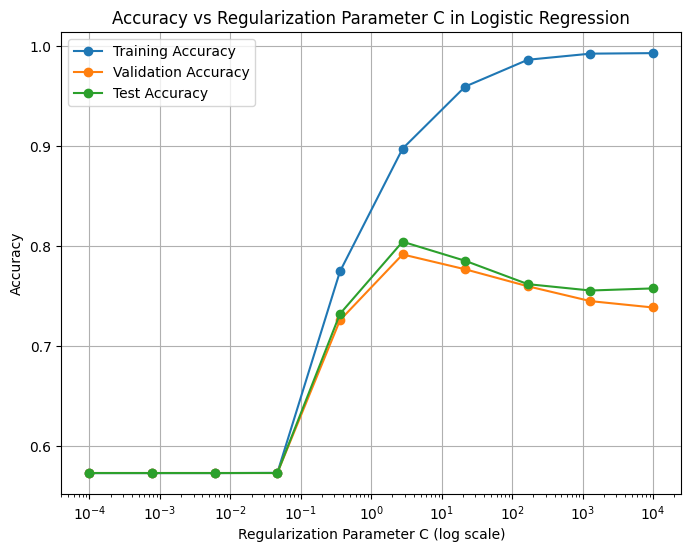

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 你已有的資料集：X_train, Y_train, X_valid, Y_valid, X_test, Y_test

# 定義一組正則化參數C (常用對數刻度)
C_values = np.logspace(-4, 4, 10)

train_acc = []
valid_acc = []
test_acc = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=123)
    model.fit(X_train, Y_train)

    # 計算準確率
    train_acc.append(accuracy_score(Y_train, model.predict(X_train)))
    valid_acc.append(accuracy_score(Y_valid, model.predict(X_valid)))
    test_acc.append(accuracy_score(Y_test, model.predict(X_test)))

# 繪圖
plt.figure(figsize=(8,6))
plt.plot(C_values, train_acc, label='Training Accuracy', marker='o')
plt.plot(C_values, valid_acc, label='Validation Accuracy', marker='o')
plt.plot(C_values, test_acc, label='Test Accuracy', marker='o')

plt.xscale('log')  # C用對數尺度顯示
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter C in Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


#59. 超參數調節
改變優化演算法和/或參數，重新訓練分類模型，找出在驗證集上正確率最高的優化演算法與參數。 使用該優化演算法與參數訓練模型后，計算所得模型在測試集上的正確率。

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 定義要嘗試的 solver 與正則化參數 C
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # 選擇幾種常用的優化器
    'C': np.logspace(-4, 4, 10),
    'max_iter': [100],  # 增加迭代次數確保收斂
    'random_state': [123]
}
# GridSearchCV，使用驗證集做為評估基準 (預設是交叉驗證，但這裡改用預留驗證集可自行寫)
grid = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)

# 印出最佳參數與最佳準確率（交叉驗證平均）
print("最佳參數:", grid.best_params_)
print("最佳交叉驗證準確率:", grid.best_score_)

# 用最佳參數建立模型，訓練整個訓練集
best_model = grid.best_estimator_
best_model.fit(X_train, Y_train)
valid_pred = best_model.predict(X_valid)
test_pred = best_model.predict(X_test)
valid_acc = accuracy_score(Y_valid, valid_pred)
test_acc = accuracy_score(Y_test, test_pred)
print(f"驗證集準確率: {valid_acc:.4f}")
print(f"測試集準確率: {test_acc:.4f}")


Newton-CG iter = 0
  Check Convergence
    max |gradient| <= tol: 0.3231351207857786 <= 0.0001 False
  Inner CG solver iteration 1 stopped with
    sum(|residuals|) <= tol: 1.438987743958388 <= 1.4693696017499398
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search was successful
Newton-CG iter = 1
  Check Convergence
    max |gradient| <= tol: 0.08115910009599127 <= 0.0001 False
  Inner CG solver iteration 5 stopped with
    sum(|residuals|) <= tol: 0.5485812760407269 <= 0.79235232290208
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search was successful
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 0.028304092231537185 <= 0.0001 False
  Inner CG solver iteration 5 stopped with
    sum(|residuals|) <= tol: 0.2909453713328043 <= 0.46386984216140914
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


  Inner CG solver iteration 5 stopped with
    sum(|residuals|) <= tol: 0.5485812760407269 <= 0.79235232290208
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search was successful
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 0.028304092231537185 <= 0.0001 False
  Inner CG solver iteration 5 stopped with
    sum(|residuals|) <= tol: 0.2909453713328043 <= 0.46386984216140914
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search was successful
Newton-CG iter = 3
  Check Convergence
    max |gradient| <= tol: 0.007617848478600622 <= 0.0001 False
  Inner CG solver iteration 5 stopped with
    sum(|residuals|) <= tol: 0.09674807609618213 <= 0.14150866980169868
  Line Search
    eps=16 * finfo.eps=3.552713678800501e-15
    try line search wolfe1
    wolfe1 line search was successful
Newton-CG iter = 4
  Check Convergence
    max |gradient| <= tol: 0.00612447394483

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
